# Galaxy Classifier

The aim of this project is to build a classifier that can infer the type of a galaxy given some input data. THese input data will be two fold:
- We will first build typical machine learning classifiers, such as the KNN, SVM, MLP etc... which take as input some processed numeric data
- In a second part of the project, we will create a convolutional deep neural network that will take as input a raw image of a galaxy

## 1. Data exploration

In this first section we use the Galaxy Zoo processed data, and explore its components and properties. The steps are strongly inspired by : https://thecleverprogrammer.com/2020/08/28/galaxy-classification-with-machine-learning/ . I use it now as a tutorial but will soon adapt it. 

The data originate from:

- tables used here: https://data.galaxyzoo.org/
- images and explanation : https://zenodo.org/record/3565489#.YBBFLPtKiUl
- context of the Galaxy Zoo project: https://www.zooniverse.org/projects/zookeeper/galaxy-zoo/about/results

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [12]:
df = pd.read_csv('data/GalaxyZoo1_DR_table2.csv')
df.head()

,OBJID,RA,DEC,NVOTE,P_EL,P_CW,P_ACW,P_EDGE,P_DK,P_MG,P_CS,P_EL_DEBIASED,P_CS_DEBIASED,SPIRAL,ELLIPTICAL,UNCERTAIN
0,587727178986356823,00:00:00.41,-10:22:25.7,59,0.610,0.034,0.000,0.153,0.153,0.051,0.186,0.610,0.186,0,0,1
1,587727227300741210,00:00:00.74,-09:13:20.2,18,0.611,0.000,0.167,0.222,0.000,0.000,0.389,0.203,0.797,1,0,0
2,587727225153257596,00:00:01.03,-10:56:48.0,68,0.735,0.029,0.000,0.147,0.074,0.015,0.176,0.432,0.428,0,0,1
3,587730774962536596,00:00:01.38,+15:30:35.3,52,0.885,0.019,0.000,0.058,0.019,0.019,0.077,0.885,0.077,0,1,0
4,587731186203885750,00:00:01.55,-00:05:33.3,59,0.712,0.000,0.000,0.220,0.068,0.000,0.220,0.640,0.290,0,0,1


**Selection of features**:  
The first column is a unique identifier which cannot be a feature for our model, and the second and third columns are the absolute positions of galaxies which do not correlate with our classes/targets, so we can remove them all:

<font color="red"> TODO: Ajouter une description de chacun des paramètres</font>

In [13]:
data = df.drop(['OBJID','RA','DEC'], axis=1)

As this is a Galaxy classification model, we have to check the class imbalance in a dataset where we perform classification task, even though its class binary imbalance may have a major effect in the phase training, and ultimately on precision. To plot the value_counts for three-class columns, we can do it like the code below:

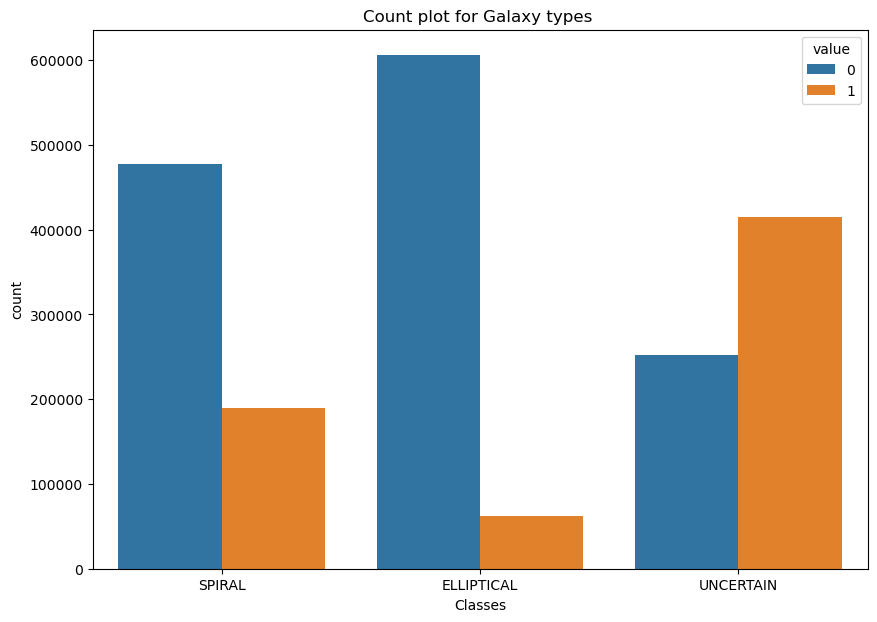

In [14]:
plt.figure(figsize=(10,7))
plt.title('Count plot for Galaxy types ')
countplt = data[['SPIRAL','ELLIPTICAL','UNCERTAIN']]
sns.countplot(x="variable", hue='value', data=pd.melt(countplt))
plt.xlabel('Classes')
plt.show()

## Splitting the data

For any machine learning model that learns from data, this is a conventional method of dividing the original data into training sets and test sets, where the allocation percentages are 80% training set and 20% test set. The data set at least should have 1000 data points to avoid overfitting and to simply increase the training period of any model. So now let’s split the data into training and test sets:

In [19]:
X = data.drop(['SPIRAL','ELLIPTICAL','UNCERTAIN'],axis=1).values  # We get rid of the labels
y = data[['SPIRAL','ELLIPTICAL','UNCERTAIN']].values # We select the labels only

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# normalize the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Building Neural Networks for Galaxy Classification Model

Sequential, in Keras, allows us to build the Multilayer Perceptron model from scratch. We can add each layer with a unit number as a parameter of the Dense function where each unit number implies that many densely connected neurons. Now let’s build neural networks using TensorFlow and Keras:

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 

In [21]:
model = Sequential()

model.add(Dense(10, activation='relu'))  # A Dense layer is a fully connected layer
model.add(Dense(5, activation='relu'))

model.add(Dense(3, activation = 'softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  # TODO: Expliquer choix de chaque paramètre

In [22]:
%time
model.fit(x=X_train, y=y_train, epochs=20)

CPU times: user 4 µs, sys: 4 µs, total: 8 µs
Wall time: 15.7 µs
Epoch 1/20


2023-03-16 12:12:32.698938: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


16699/16699 [==============================] - 5s 309us/step - loss: 0.2843 - accuracy: 0.8765
Epoch 2/20
16699/16699 [==============================] - 5s 308us/step - loss: 0.2508 - accuracy: 0.8907
Epoch 3/20
16699/16699 [==============================] - 5s 309us/step - loss: 0.2477 - accuracy: 0.8933
Epoch 4/20
16699/16699 [==============================] - 5s 310us/step - loss: 0.2459 - accuracy: 0.8941
Epoch 5/20
16699/16699 [==============================] - 5s 310us/step - loss: 0.2433 - accuracy: 0.8955
Epoch 6/20
16699/16699 [==============================] - 5s 305us/step - loss: 0.2395 - accuracy: 0.8977
Epoch 7/20
16699/16699 [==============================] - 5s 305us/step - loss: 0.2365 - accuracy: 0.8984
Epoch 8/20
16699/16699 [==============================] - 5s 307us/step - loss: 0.2343 - accuracy: 0.8984
Epoch 9/20
16699/16699 [==============================] - 5s 306us/step - loss: 0.2321 - accuracy: 0.8985
Epoch 10/20
16699/16699 [==============================] 

Now let’s plot the accuracy to have a look at the accuracy of the neural networks at each epoch:

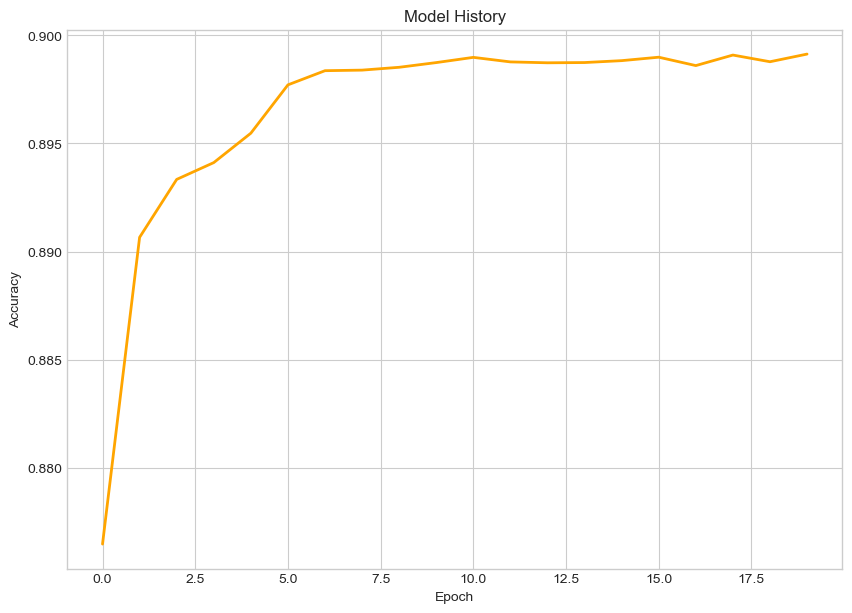

In [27]:
plt.style.use("seaborn-v0_8-whitegrid")
mod_history = pd.DataFrame(model.history.history)
plt.figure(figsize=(10,7))
plt.title('Model History')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.plot(mod_history['accuracy'], color='orange', lw=2);

From this precision graph, we can deduce that after a certain epoch, i.e. approximately from the 6th epoch, the precision remained constant for all other epochs. Now let’s take our model through the confusion matrix algorithm and print a classification report:

In [32]:
from sklearn.metrics import confusion_matrix, classification_report

In [33]:
y_pred = np.argmax(model.predict(X_test), axis=-1)  # https://stackoverflow.com/questions/68836551/keras-attributeerror-sequential-object-has-no-attribute-predict-classes
confusion_matrix(y_test.argmax(axis=1), y_pred)
print(classification_report(y_test.argmax(axis=1), y_pred))

4175/4175 [==============================] - 1s 227us/step
              precision    recall  f1-score   support

           0       0.89      0.86      0.87     38281
           1       0.87      0.81      0.84     12554
           2       0.91      0.93      0.92     82754

    accuracy                           0.90    133589
   macro avg       0.89      0.87      0.88    133589
weighted avg       0.90      0.90      0.90    133589

